# Análise de Dados

## Importando Bibliotecas

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


## Importando o Dataset

In [8]:
df = pd.read_csv('netflix_titles.csv')

## Visualizando os Dados 

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [177]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Perguntas:

### Quais as colunas estão presentes no dataset?

In [185]:
columns = df.columns
print(", ".join(columns))

show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description


Utilizando a propriedade "columns" de um dataframe de pandas é possível observar todas as colunas presentes no dataset. Ao utilizar este comando com o dataset em questão, chegamos que as seguintes colunas estão presentes: show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description. 



### Quantos filmes estão disponíveis na Netflix?

In [70]:
print(f'Tipos de conteúdos na Netflix:\n {df["type"]}\n')
print(f'Quantidades de cada tipo de conteúdo:\n {df["type"].value_counts()}\n')
print(f'Quantidade de entradas vazias na coluna de tipos de conteúdo: {df["type"].isnull().sum()}\n')
print(f'Quantidade de filmes disponíveis: {df["type"].value_counts()["Movie"]}')                                   


Tipos de conteúdos na Netflix:
 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

Quantidades de cada tipo de conteúdo:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Quantidade de entradas vazias na coluna de tipos de conteúdo: 0

Quantidade de filmes disponíveis: 6131


Acessando a coluna no pandas dataframe que corresponde aos tipos de conteúdo com "df["type"]" e utilizando o método value.counts() podemos ver as quantidades de filmes e séries no dataset. Porém podemos ser mais específicos e acessar a coluna ["Movie"] do dataframe que foi retornado por "df["type"].value_counts()" com "df["type"].value_counts().["Movie"]" e com isso chegamos que 6131 filmes estão disponíveis na plataforma. E para conferir que esse valor esteja correto, foi verificado a quantidade de entradas vazias na coluna de tipos com "df["type"].isnull().sum()", com esta sentença, se houvessem quaisquer entradas vazias nessa coluna, um número diferente de 0 apareceria como retorno. 

### Quem são os 5 diretores com mais filmes e séries na plataforma?

In [108]:
df_director = df['director']
print(df_director.isnull().sum())

df_director = df_director.dropna()
print(df_director.isnull().sum())

top_5_directors = df_director.value_counts().head(5)
print(top_5_directors)
top_5_directors = df_director.value_counts().head(4)
top_5_directors_list = top_5_directors.index.tolist()
print(f'Os cinco diretores com mais filmes e séries são:\n{", ".join(top_5_directors_list)}')


2634
0
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64
Os cinco diretores com mais filmes e séries são:
Rajiv Chilaka, Raúl Campos, Jan Suter, Marcus Raboy, Suhas Kadav


Separando somente a coluna de diretores, primeiramente foi verificado se existiam entradas vazias nessa coluna com a sentença "df_director.isnull().sum()", com ela foi descoberto que existiam 2634 entradas vazias, foram retiradas essas entradas usando o método "dropna()". Após isso, foi conferido se de fato todas as vazias foram retiradas e foi realizada a contagem de entradas que cada diretor possui no dataset com o "value_counts()", e ao rodar o "head(5)" em seu retorno, foi recebido somente as 5 entradas mais comuns no dataset, porém foi verificado que a segunda entrada mais comum no dataset possui dois diretores juntos, por conta disso, foi utilizado o "head(4)" e transformado o para lista o resultado para visualizar melhor. Com isso, temos que os diretores com mais filmes e séries são: Rajiv Chilaka, Raúl Campos, Jan Suter, Marcus Raboy, Suhas Kadav.

### Quais diretores também atuaram como atores em suas próprias produções?

In [31]:
df_director_cast = df[['director', 'cast']]
print(df_director_cast.head(), "\n")

df_director_cast = df_director_cast.dropna()
print(df_director_cast.head(), "\n")

directors_in_cast = df_director_cast[df_director_cast.apply(lambda row: row['director'] in row['cast'], axis=1)]

directors_in_cast = directors_in_cast["director"].drop_duplicates()

print(f'Os diretores que também atuaram em suas produções:\n{", ".join(directors_in_cast)}')

          director                                               cast
0  Kirsten Johnson                                                NaN
1              NaN  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2  Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3              NaN                                                NaN
4              NaN  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K... 

                        director  \
2                Julien Leclercq   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   

                                                cast  
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...  
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   

Os diretores que também atuar

Inicialmente foi criado um outro dataframe com somente as colunas de diretores e elenco, após isso foi verificado que existiam entradas com pelo menos um dos campos vazios, e estas foram retiradas. Após isso foi rodado uma pequena função que verificava pra cada linha se o diretor também estava na coluna de elenco, e os diretores que estavam nas duas colunas foram adicionados em "director_in_cast", no qual foi rodado o método "drop_duplicates()" para retirar entradas que valores repetidos. Com isso, foi possível descobrir que os diretores participaram de suas produções como atores, estes estão na saída da célula anterior.


### Explore o dataset e compartilhe um insight ou número que você considere interessante

In [9]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
df.drop('show_id', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('date_added', axis=1, inplace=True)

In [14]:
df

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies"


#### Análise de Gêneros 

In [44]:
genres = df['listed_in'].str.split(', ')
print(genres.value_counts())

listed_in
[Dramas, International Movies]                          362
[Documentaries]                                         359
[Stand-Up Comedy]                                       334
[Comedies, Dramas, International Movies]                274
[Dramas, Independent Movies, International Movies]      252
                                                       ... 
[Kids' TV, TV Action & Adventure, TV Dramas]              1
[TV Comedies, TV Dramas, TV Horror]                       1
[Children & Family Movies, Comedies, LGBTQ Movies]        1
[Kids' TV, Spanish-Language TV Shows, Teen TV Shows]      1
[Cult Movies, Dramas, Thrillers]                          1
Name: count, Length: 514, dtype: int64


In [42]:
genres_counts = genres.explode().value_counts()
print(genres_counts)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [56]:
countries_inter = df[df['listed_in'].apply(lambda row: "International Movies" in row)]
countries_inter = countries_inter['country']
countries_inter_count = countries_inter.value_counts()
print(countries_inter_count.isnull().sum())
print(countries_inter_count)

0
country
India                                   817
Spain                                    90
Egypt                                    89
Nigeria                                  81
Turkey                                   74
                                       ... 
Colombia, Peru, United Kingdom            1
United States, Spain                      1
Germany, Italy                            1
Taiwan, China, France, United States      1
United Arab Emirates, Jordan              1
Name: count, Length: 393, dtype: int64


Foi inicialemente observado quais foram os gêneros de produções mais frequentes na plataforma, e foi observado que muitas vezes apareciam mais de um gênero para cada título, por isso foi feita uma busca diferente para verificar cada gênero sozinho e não somente o conjunto de gêneros mais comum. Com isso, pôde-se concluir que o conjunto de gêneros mais comum foi "Drama, Internacional Movies", e o gênero mais frequente foi "Internacional Movies". O fato de ter esse como gênero mais comum levantou-se um questionamento do que seria esse internacional, por isso, foi observado de quais eram os países que possuíam este gênero e feito um ranqueamento por quantidade de aparições no dataset, e foi obtido que a Índia possui a maior quantidade desses títulos, sendo seguida com uma grande diferença pela Espanha e o Egito. 

#### Análise Ano de Lançamento

In [32]:
df['release_year'].isnull().sum()

0

In [45]:
count_produ_year = df['release_year'].value_counts().head(10)
count_produ_year

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

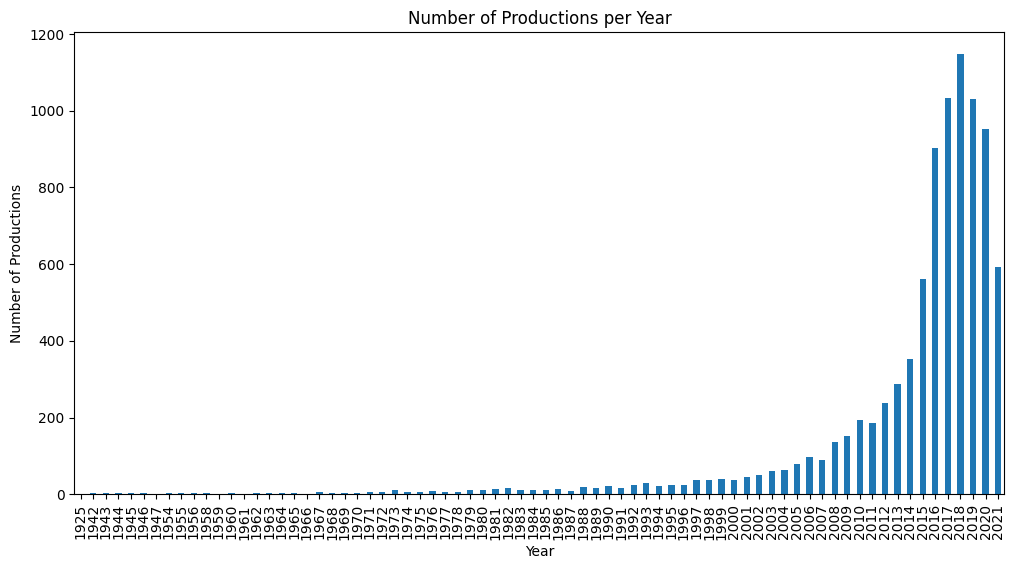

In [31]:
count_produ_year.sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Productions')
plt.title('Number of Productions per Year')
plt.show()

Foi analisado o ano de lançamento de filmes e séries na plataforma utilizando o método "value_counts()", e após a plotagem de um gráfico de barras, utilizando a biblioteca matplotlib, foi observado um comportamento de exponencial na quantidade de produções cinematográficas produzidas, cuminando no ano de 2018. Com esse gráfico é possível observar uma drástica queda na quantidade de conteúdos produzidos entre 2020 e 2021, queda esta que pode ter sido causada, muito provavelmente por conta da pandamemia do Covid19 que se instaurou em 2020, prejudicando muitos serviços e indústrias, inclusive a cinematográfica. Esta queda foi a maior observada no perído, e seria muito interessante observar os anos subsequentes para se obter mais informações a respeito desse comportamento, mas o dataset infelizmente acaba em 2021, impossibilitando futuras análises.
